 -----------------------------------------------------------------------------------------------------

# 1. Initial Setup and Data Loading
- Objective: Load the data and check its structure, types, and missing values.
- Code:

In [85]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [86]:
# Load the data
train_data = pd.read_csv('P1 Data/Consumer_Complaints_train.csv')
test_data = pd.read_csv('P1 Data/Consumer_Complaints_test_share.csv')

In [87]:
# 2. Rename Columns (Place Here)
train_data.columns = train_data.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('-', '_')
test_data.columns = test_data.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('-', '_')

# Display new column names
print(train_data.columns)


Index(['date_received', 'product', 'sub_product', 'issue', 'sub_issue',
       'consumer_complaint_narrative', 'company_public_response', 'company',
       'state', 'zip_code', 'tags', 'consumer_consent_provided?',
       'submitted_via', 'date_sent_to_company', 'company_response_to_consumer',
       'timely_response?', 'consumer_disputed?', 'complaint_id'],
      dtype='object')


In [88]:
train_data.columns

Index(['date_received', 'product', 'sub_product', 'issue', 'sub_issue',
       'consumer_complaint_narrative', 'company_public_response', 'company',
       'state', 'zip_code', 'tags', 'consumer_consent_provided?',
       'submitted_via', 'date_sent_to_company', 'company_response_to_consumer',
       'timely_response?', 'consumer_disputed?', 'complaint_id'],
      dtype='object')

In [89]:
test_data.columns

Index(['date_received', 'product', 'sub_product', 'issue', 'sub_issue',
       'consumer_complaint_narrative', 'company_public_response', 'company',
       'state', 'zip_code', 'tags', 'consumer_consent_provided?',
       'submitted_via', 'date_sent_to_company', 'company_response_to_consumer',
       'timely_response?', 'complaint_id'],
      dtype='object')

In [90]:
train_data.shape

(478421, 18)

In [91]:
test_data.shape

(119606, 17)

In [92]:
train_data.dtypes

date_received                   object
product                         object
sub_product                     object
issue                           object
sub_issue                       object
consumer_complaint_narrative    object
company_public_response         object
company                         object
state                           object
zip_code                        object
tags                            object
consumer_consent_provided?      object
submitted_via                   object
date_sent_to_company            object
company_response_to_consumer    object
timely_response?                object
consumer_disputed?              object
complaint_id                     int64
dtype: object

In [93]:
test_data.dtypes

date_received                   object
product                         object
sub_product                     object
issue                           object
sub_issue                       object
consumer_complaint_narrative    object
company_public_response         object
company                         object
state                           object
zip_code                        object
tags                            object
consumer_consent_provided?      object
submitted_via                   object
date_sent_to_company            object
company_response_to_consumer    object
timely_response?                object
complaint_id                     int64
dtype: object

# EDA

# 2. Data Cleaning and Missing Values Analysis
- Objective: Check for missing data and decide on handling strategies based on the amount and importance of missing data in each column.
- Code:

In [94]:
# Check missing values
missing_values = train_data.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing_values / len(train_data)) * 100

# Display missing data stats
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage (%)': missing_percentage})
print(missing_data[missing_data['Missing Values'] > 0])


                              Missing Values  Percentage (%)
tags                                  411215       85.952540
consumer_complaint_narrative          403327       84.303783
company_public_response               388029       81.106181
consumer_consent_provided?            342934       71.680382
sub_issue                             292625       61.164748
sub_product                           138473       28.943755
zip_code                                3848        0.804313
state                                   3839        0.802431


In [95]:
train_data['sub_product'].fillna(train_data['sub_product'].mode()[0], inplace=True)
test_data['sub_product'].fillna(train_data['sub_product'].mode()[0], inplace=True)

C:\Users\D MADHAN MOHAN\AppData\Local\Temp\ipykernel_11976\2922779.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['sub_product'].fillna(train_data['sub_product'].mode()[0], inplace=True)
C:\Users\D MADHAN MOHAN\AppData\Local\Temp\ipykernel_11976\2922779.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are se

In [96]:
for col in ['zip_code', 'state']:
    train_data[col].fillna(train_data[col].mode()[0], inplace=True)
    test_data[col].fillna(train_data[col].mode()[0], inplace=True)

C:\Users\D MADHAN MOHAN\AppData\Local\Temp\ipykernel_11976\3841406031.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data[col].fillna(train_data[col].mode()[0], inplace=True)
C:\Users\D MADHAN MOHAN\AppData\Local\Temp\ipykernel_11976\3841406031.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values a

In [97]:
# Dropping columns with >50% missing data
cols_to_drop = ['tags', 'consumer_complaint_narrative', 'company_public_response', 
                'consumer_consent_provided?', 'sub_issue']

train_data.drop(columns=cols_to_drop, inplace=True)
test_data.drop(columns=cols_to_drop, inplace=True)

print(f"Dropped columns: {cols_to_drop}")

Dropped columns: ['tags', 'consumer_complaint_narrative', 'company_public_response', 'consumer_consent_provided?', 'sub_issue']


In [98]:
# Ensure no missing values remain
print(train_data.isnull().sum().sum())  # Should be 0
print(test_data.isnull().sum().sum())   # Should be 0

0
1


## Outliers removal step

* *identify the method*

In [99]:
# Identifying numerical columns
num_cols = train_data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Function to detect outliers using IQR
def detect_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] < lower_bound) | (df[col] > upper_bound)]

# Checking outliers for each numerical column
for col in num_cols:
    outliers = detect_outliers(train_data, col)
    print(f"Column: {col}, Outliers detected: {len(outliers)}")

Column: complaint_id, Outliers detected: 0


# 🔗 1️⃣ Correlation Between Numerical Features & Target

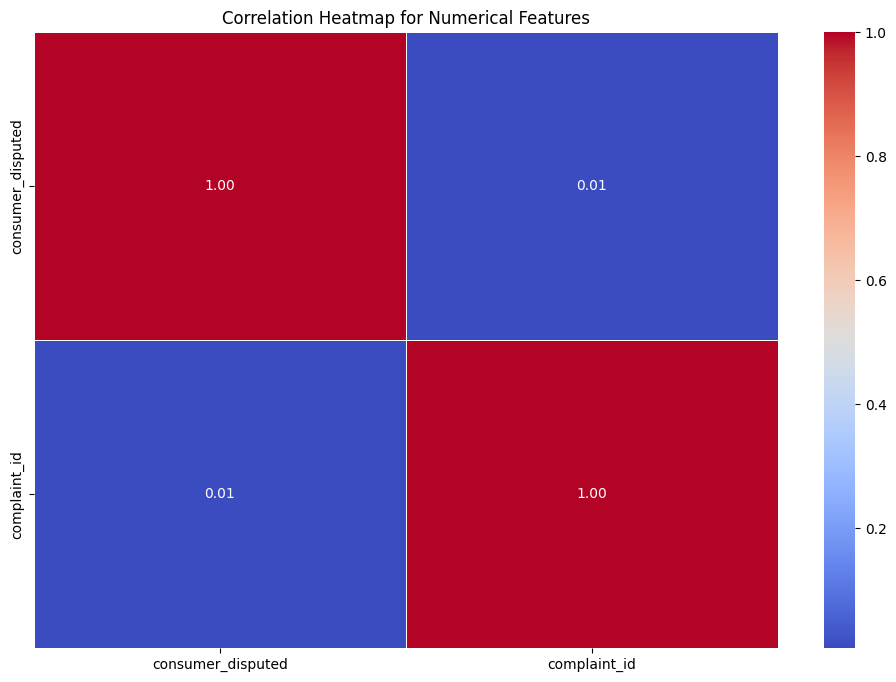

Correlation with Target:
 consumer_disputed    1.000000
complaint_id         0.006863
Name: consumer_disputed, dtype: float64


In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

# Rename the column for simplicity
train_data.rename(columns={'consumer_disputed?': 'consumer_disputed'}, inplace=True)

# Convert 'consumer_disputed' to numeric
train_data['consumer_disputed'] = train_data['consumer_disputed'].apply(lambda x: 1 if x == 'Yes' else 0)

# Ensure only numeric columns are included
num_cols = train_data.select_dtypes(include=['int64', 'float64']).columns

# Correlation Matrix
correlation_matrix = train_data[num_cols].corr()

# Plotting the Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap for Numerical Features')
plt.show()

# Correlation with Target
target_corr = train_data[num_cols].corr()['consumer_disputed'].sort_values(ascending=False)
print("Correlation with Target:\n", target_corr)

# ⚡ 2️⃣ One-Way ANOVA (Categorical Features vs. Target)

In [101]:
# Filter out high-cardinality columns
cat_cols = [col for col in train_data.select_dtypes(include='object').columns if train_data[col].nunique() <= 50]

In [102]:
from scipy.stats import f_oneway

# Optimized ANOVA function
def fast_anova(df, cat_col, target):
    return f_oneway(*(df.groupby(cat_col)[target].apply(list)))

anova_results = {}

# Run ANOVA on filtered categorical columns
for col in cat_cols:
    try:
        f_stat, p_value = fast_anova(train_data, col, 'consumer_disputed')
        anova_results[col] = p_value
    except:
        continue  # Skip columns where ANOVA fails

# Display sorted p-values
anova_sorted = sorted(anova_results.items(), key=lambda x: x[1])
for col, p_value in anova_sorted:
    print(f'Feature: {col}, p-value: {p_value}')

Feature: product, p-value: 0.0
Feature: sub_product, p-value: 0.0
Feature: submitted_via, p-value: 0.0
Feature: company_response_to_consumer, p-value: 0.0
Feature: timely_response?, p-value: 0.020665067983879785


## Visualizations

1️⃣ Data Distribution (Numerical Features)

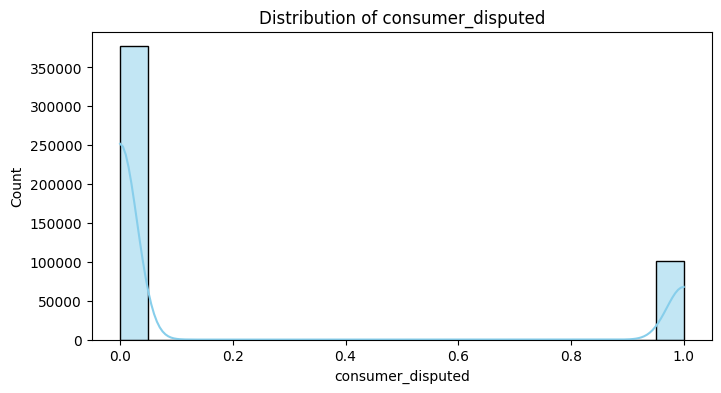

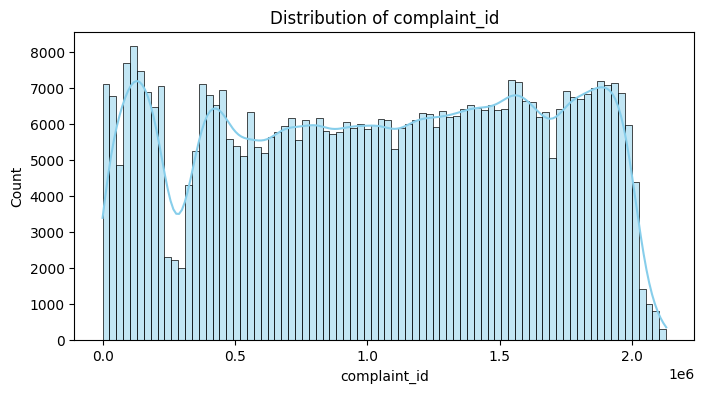

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting histograms for numerical features
num_cols = train_data.select_dtypes(include=['int64', 'float64']).columns

for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(train_data[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.show()


Why?

* Identifies skewness, data spread, and helps decide if transformation is needed.


2️⃣ Correlation Heatmap (For Feature Relationships)

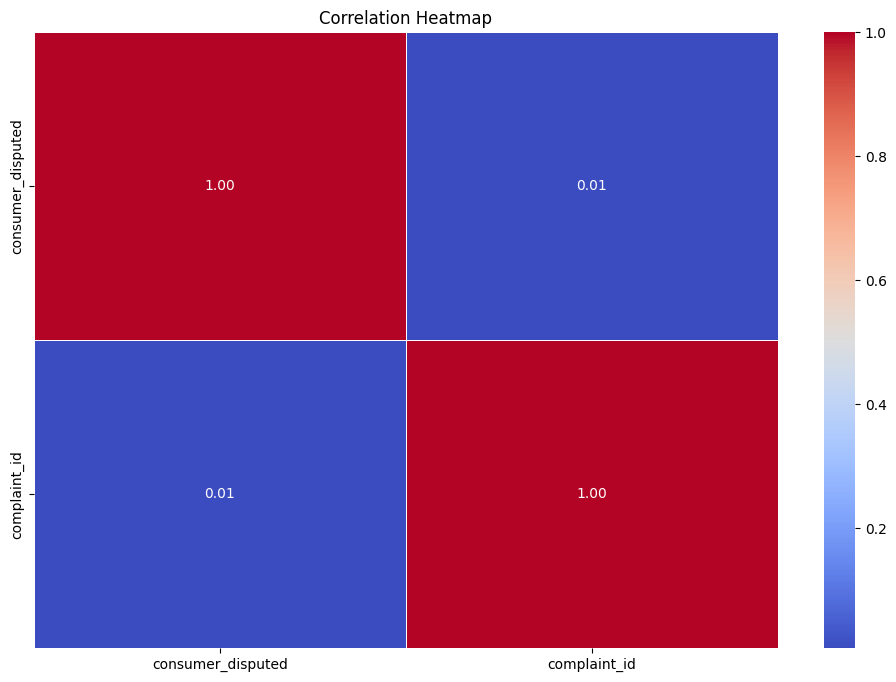

In [104]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
corr = train_data[num_cols].corr()

sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Why?

* Shows relationships between numerical variables.
* Helps identify multicollinearity issues.

3️⃣ Categorical Feature Distribution (e.g., State, Product)

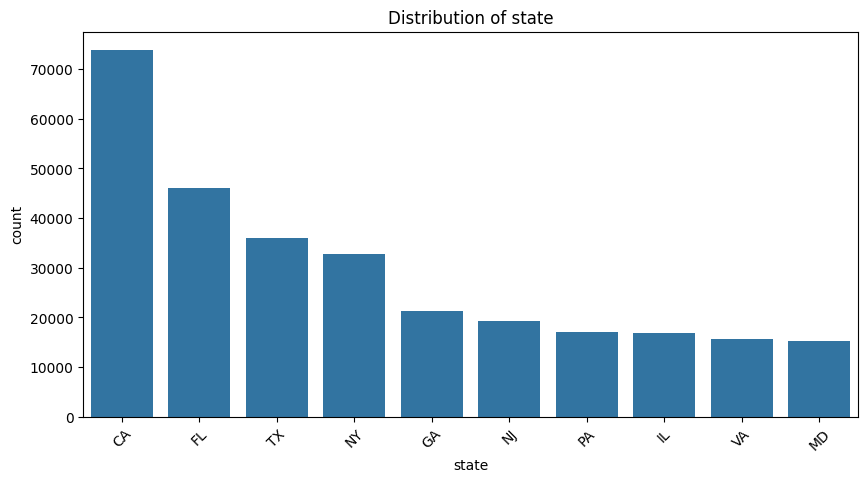

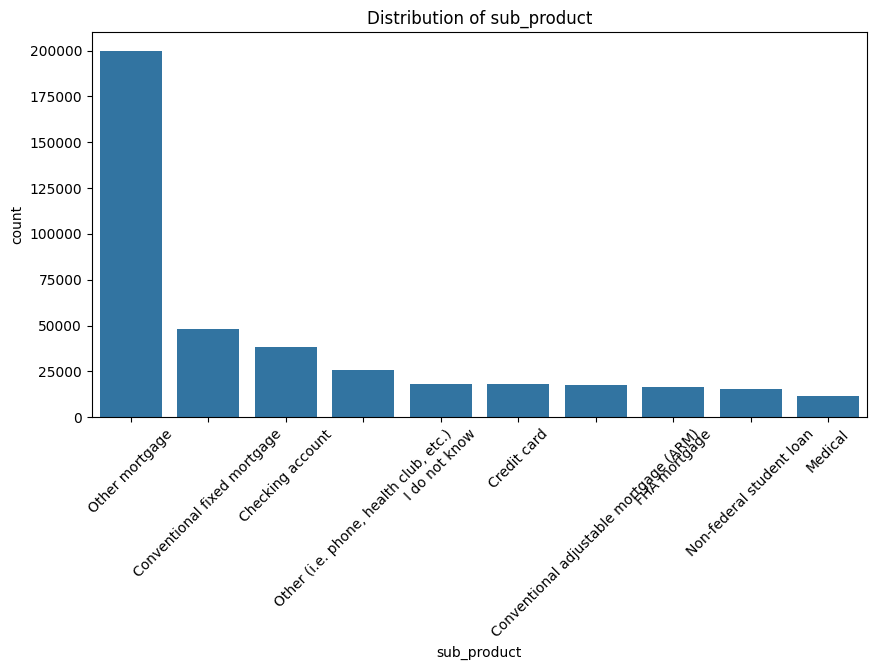

In [105]:
# Visualizing categorical features
cat_cols = ['state', 'sub_product']  # Add more if needed

for col in cat_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=train_data, x=col, order=train_data[col].value_counts().index[:10])
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

Why?

* Understands the frequency of categories.
* Detects imbalanced classes.

4️⃣ Target Variable vs. Features (Impact on Consumer Dispute)

C:\Users\D MADHAN MOHAN\AppData\Local\Temp\ipykernel_11976\889995522.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='sub_product', y='consumer_disputed', data=train_data, ci=None)


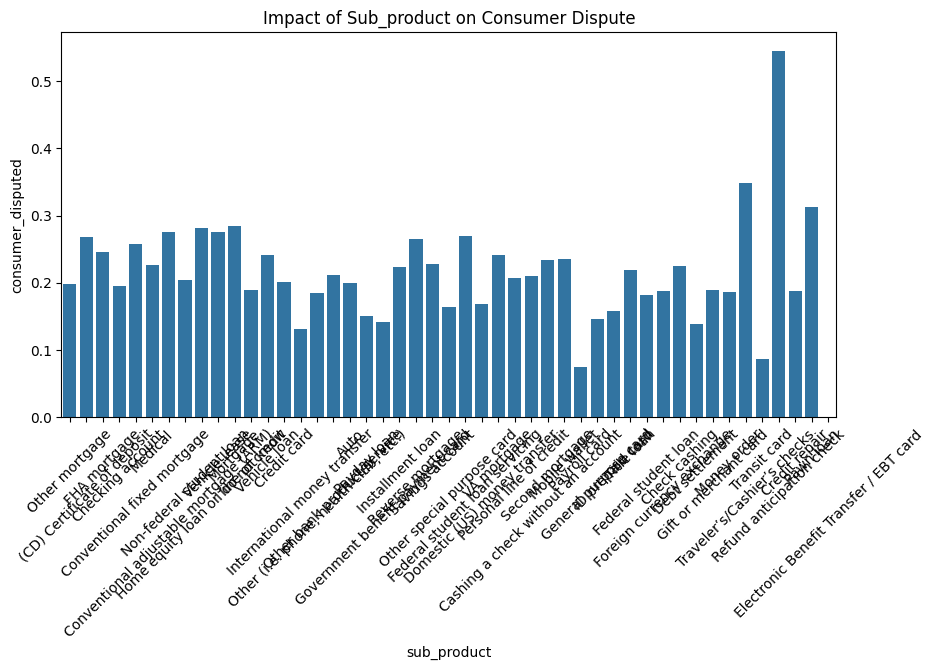

In [106]:
# Rename the column for simplicity
train_data.rename(columns={'Consumer disputed?': 'consumer_disputed'}, inplace=True)

# Consumer Disputed vs. sub_product
plt.figure(figsize=(10, 5))
sns.barplot(x='sub_product', y='consumer_disputed', data=train_data, ci=None)
plt.title('Impact of Sub_product on Consumer Dispute')
plt.xticks(rotation=45)
plt.show()

# Feature Engineering

In [107]:
# 📍 Feature Engineering Starts Here

# 1. TF-IDF for Text Data
if 'consumer_complaint_narrative' in train_data.columns:
    from sklearn.feature_extraction.text import TfidfVectorizer
    tfidf = TfidfVectorizer(max_features=100)
    
    train_tfidf = tfidf.fit_transform(train_data['consumer_complaint_narrative'].fillna(''))
    test_tfidf = tfidf.transform(test_data['consumer_complaint_narrative'].fillna(''))
    
    tfidf_train_df = pd.DataFrame(train_tfidf.toarray(), columns=tfidf.get_feature_names_out())
    tfidf_test_df = pd.DataFrame(test_tfidf.toarray(), columns=tfidf.get_feature_names_out())
    
    train_data = pd.concat([train_data.reset_index(drop=True), tfidf_train_df], axis=1)
    test_data = pd.concat([test_data.reset_index(drop=True), tfidf_test_df], axis=1)
    
    train_data.drop('consumer_complaint_narrative', axis=1, inplace=True)
    test_data.drop('consumer_complaint_narrative', axis=1, inplace=True)

In [108]:
# 2. Drop Consumer ID
train_data.drop('consumer_id', axis=1, inplace=True, errors='ignore')
test_data.drop('consumer_id', axis=1, inplace=True, errors='ignore')

In [109]:
# 3. Encode ZIP Codes
from sklearn.preprocessing import LabelEncoder
if 'zip_code' in train_data.columns:
    le = LabelEncoder()
    combined_zip_codes = pd.concat([train_data['zip_code'], test_data['zip_code']]).astype(str)
    le.fit(combined_zip_codes)
    train_data['zip_code'] = le.transform(train_data['zip_code'].astype(str))
    test_data['zip_code'] = le.transform(test_data['zip_code'].astype(str))

In [110]:
# Ensure 'consumer_disputed' column exists
if 'consumer_disputed' not in train_data.columns:
    train_data['consumer_disputed'] = 0
if 'consumer_disputed' not in test_data.columns:
    test_data['consumer_disputed'] = 0

# 4. NaN Indicators
for col in train_data.columns:
    train_data[f'{col}_missing'] = train_data[col].isnull().astype(int)
    test_data[f'{col}_missing'] = test_data[col].isnull().astype(int)

## Data Preprocessing

In [111]:
# ✅ Check if both columns exist
if 'complaint_month' in train_data.columns and 'zip_code' in train_data.columns:
    # Fill NaN values with 0 to avoid errors during multiplication
    train_data['complaint_month'].fillna(0, inplace=True)
    test_data['complaint_month'].fillna(0, inplace=True)
    train_data['zip_code'].fillna(0, inplace=True)
    test_data['zip_code'].fillna(0, inplace=True)

    # Ensure both columns are numeric
    train_data['complaint_month'] = pd.to_numeric(train_data['complaint_month'], errors='coerce').fillna(0)
    test_data['complaint_month'] = pd.to_numeric(test_data['complaint_month'], errors='coerce').fillna(0)
    train_data['zip_code'] = pd.to_numeric(train_data['zip_code'], errors='coerce').fillna(0)
    test_data['zip_code'] = pd.to_numeric(test_data['zip_code'], errors='coerce').fillna(0)

    # ✅ Create the interaction feature
    train_data['interaction_feature'] = train_data['complaint_month'] * train_data['zip_code']
    test_data['interaction_feature'] = test_data['complaint_month'] * test_data['zip_code']
    
    print("Interaction feature created successfully.")
else:
    print("Error: 'complaint_month' or 'zip_code' column not found.")


Error: 'complaint_month' or 'zip_code' column not found.


In [112]:
# 2️⃣ Encode Categorical Features
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
cat_cols = train_data.select_dtypes(include='object').columns

In [113]:
# Apply Label Encoding
le = LabelEncoder()
for col in cat_cols:
    combined_data = pd.concat([train_data[col], test_data[col]], axis=0).astype(str)
    le.fit(combined_data)
    train_data[col] = le.transform(train_data[col].astype(str))
    test_data[col] = le.transform(test_data[col].astype(str))

In [114]:
# 3️⃣ Final Data Check
# Ensure all data is numeric
print(train_data.dtypes)

date_received                           int32
product                                 int32
sub_product                             int32
issue                                   int32
company                                 int32
state                                   int32
zip_code                                int32
submitted_via                           int32
date_sent_to_company                    int32
company_response_to_consumer            int32
timely_response?                        int32
consumer_disputed                       int64
complaint_id                            int64
date_received_missing                   int32
product_missing                         int32
sub_product_missing                     int32
issue_missing                           int32
company_missing                         int32
state_missing                           int32
zip_code_missing                        int32
submitted_via_missing                   int32
date_sent_to_company_missing      

In [115]:
train_data.head()

,date_received,product,sub_product,issue,company,state,zip_code,submitted_via,date_sent_to_company,company_response_to_consumer,...,issue_missing,company_missing,state_missing,zip_code_missing,submitted_via_missing,date_sent_to_company_missing,company_response_to_consumer_missing,timely_response?_missing,consumer_disputed_missing,complaint_id_missing
0,896,2,31,14,3352,29,14580,5,846,1,...,0,0,0,0,0,0,0,0,0,0
1,1022,0,0,63,2796,46,5213,4,977,0,...,0,0,0,0,0,0,0,0,0,0
2,833,3,31,52,1134,8,24775,4,803,3,...,0,0,0,0,0,0,0,0,0,0
3,1324,2,31,14,3186,15,9082,5,1273,2,...,0,0,0,0,0,0,0,0,0,0
4,1085,2,31,88,421,25,644,5,1042,1,...,0,0,0,0,0,0,0,0,0,0


# 7. Model Preparation
- Objective: Separate the data into features and target, and split it for training and validation.
- Code:

In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# Splitting the data
X = train_data.drop('consumer_disputed', axis=1)
y = train_data['consumer_disputed']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


## Scaler

In [117]:
from sklearn.preprocessing import StandardScaler

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [118]:
# Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

# Model Evaluation
y_pred_prob = log_reg.predict_proba(X_val_scaled)[:, 1]
auc_score = roc_auc_score(y_val, y_pred_prob)
print(f'Logistic Regression AUC Score: {auc_score:.4f}')

Logistic Regression AUC Score: 0.5801


In [119]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=42)
rf_model.fit(X_train, y_train)

# Model Evaluation
rf_pred_prob = rf_model.predict_proba(X_val)[:, 1]
rf_auc = roc_auc_score(y_val, rf_pred_prob)
print(f'Random Forest AUC Score: {rf_auc:.4f}')

Random Forest AUC Score: 0.6487


In [120]:
import xgboost as xgb

# XGBoost Model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Model Evaluation
xgb_pred_prob = xgb_model.predict_proba(X_val)[:, 1]
xgb_auc = roc_auc_score(y_val, xgb_pred_prob)
print(f'XGBoost AUC Score: {xgb_auc:.4f}')

c:\Users\D MADHAN MOHAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:33:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost AUC Score: 0.6489


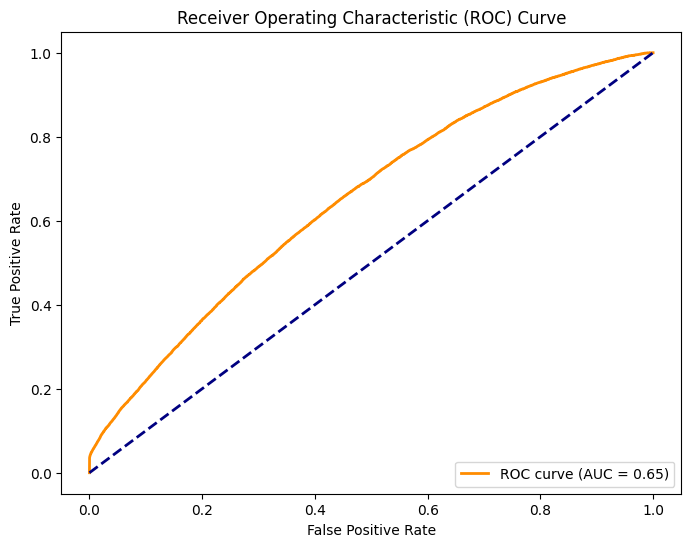

In [121]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# ROC Curve Calculation using RandomForest predicted probabilities
fpr, tpr, thresholds = roc_curve(y_val, rf_pred_prob)
roc_auc = auc(fpr, tpr)

# Plotting the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Prediction & Submission

In [124]:
# If you trained a logistic regression model earlier
from sklearn.linear_model import LogisticRegression

# Re-train if not already trained
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)  # Make sure X_train and y_train are defined

# Drop 'consumer_disputed' column from test_data
test_data_features = test_data.drop(columns=['consumer_disputed'])

# Now, generate predictions
predictions = model.predict(test_data_features)
prob_predictions = model.predict_proba(test_data_features)[:, 1]

c:\Users\D MADHAN MOHAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [127]:
import pandas as pd

# Using 'complaint_id' from test_data as the ID for the test data
submission = pd.DataFrame({
    'ID': test_data['complaint_id'],  # Use the 'complaint_id' column from test_data
    'Prediction': predictions  # Or prob_predictions if required
})

# Export to CSV
submission.to_csv('final_submission.csv', index=False)

In [128]:
print(submission.head())
print(submission.info())
print(submission.isnull().sum())

        ID  Prediction
0   675956           0
1  1858795           0
2    32637           0
3  1731374           0
4   501487           0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119606 entries, 0 to 119605
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   ID          119606 non-null  int64
 1   Prediction  119606 non-null  int64
dtypes: int64(2)
memory usage: 1.8 MB
None
ID            0
Prediction    0
dtype: int64


-----------

In [132]:
# ✅ 1️⃣ Import Required Libraries
import pandas as pd
import numpy as np

# ✅ 2️⃣ Generate Predictions
# Assuming your trained model is named 'model' and the test data is 'X_test'
# Replace 'X_test' with your actual test dataset variable

# For classification (getting class labels)
predictions = model.predict(test_data_features)

# If probabilities are required (commonly for competitions like Kaggle)
prob_predictions = model.predict_proba(test_data_features)[:, 1]  # Probability for class 1

# ✅ 3️⃣ Prepare the Submission File
# Replace 'test_ids' with the actual ID column from your test dataset
# If you don’t have an ID column, you can use an index

# Example assuming 'test_data' contains the test set with an 'ID' column
test_ids = test_data['ID'] if 'ID' in test_data.columns else np.arange(len(test_data_features))

# Creating the submission DataFrame
submission = pd.DataFrame({
    'ID': test_ids,                 # Mapping predictions to IDs
    'Prediction': prob_predictions  # Use 'predictions' if class labels are required
})

# ✅ 4️⃣ Validate the Submission Format
# Checking the first few rows
print(submission.head())

# Checking for missing values
print(submission.isnull().sum())

# ✅ 5️⃣ Export the Submission File
# Saving the submission file in CSV format
submission.to_csv('final_submission.csv', index=False)

print("✅ Submission file 'final_submission.csv' created successfully!")

   ID  Prediction
0   0    0.218179
1   1    0.277413
2   2    0.314048
3   3    0.183521
4   4    0.238102
ID            0
Prediction    0
dtype: int64
✅ Submission file 'final_submission.csv' created successfully!
